# Car Price Prediction — Data Cleaning, Visualization & Modeling

### Dataset
The dataset used in this project is the *Car Price Prediction* dataset from Kaggle.  
[https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge](#)

### Why I Chose This Dataset
I chose this dataset because I am personally interested in automotive data and pricing logic.  
Cars provide a realistic example for data cleaning and regression modeling,  
as they include numeric (price, year, engine size) and categorical (manufacturer, fuel type) features.

### Goal
The goal of this project is to investigate the relationship between **car price** and **production year** —  
to see whether newer cars tend to have higher prices.  
Later, I also explore a secondary relationship between **engine volume** and **vehicle tax (Levy)**.


## Step 1 — Initial Data Exploration


### Step 1.1 — Load the dataset
Load the CSV file to examine the first few rows and understand its structure.

In [67]:
import pandas as pd

csv_path = r"../data/car_price_prediction.csv"
df = pd.read_csv(csv_path)
df.head(10)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


### Step 1.2 — Check dataset structure
Display the dataset information: number of rows, columns, data types, and missing values.


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### Step 1.3 — Inspect key numeric-like columns
Check unique values for important columns that will later be used in the model.

Even though the dataset does not contain explicit `NaN` values,  
we cannot assume it is perfectly clean — missing or corrupted data may appear in other forms  
(such as “–”, text units like “km”, or mixed numeric and string formats).  
This inspection helps us detect such issues before cleaning.

In [69]:
print("\n--- Sample unique values in key numeric-like columns ---\n")

print("Price:", df['Price'].unique()[:10])
print("\nLevy:", df['Levy'].unique()[:10])
print("\nProd. year:", df['Prod. year'].unique()[:10])
print("\nEngine volume:", df['Engine volume'].unique()[:10])
print("\nMileage:", df['Mileage'].unique()[:10])



--- Sample unique values in key numeric-like columns ---

Price: [13328 16621  8467  3607 11726 39493  1803   549  1098 26657]

Levy: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053']

Prod. year: [2010 2011 2006 2014 2016 2013 2007 1999 1997 2018]

Engine volume: ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3']

Mileage: ['186005 km' '192000 km' '200000 km' '168966 km' '91901 km' '160931 km'
 '258909 km' '216118 km' '398069 km' '128500 km']


## Step 2 — Data Cleaning & Preparation


### Step 2.1 — Focus on "Price" and "Prod. year"
For the first version of the model, we will focus only on two columns:
- **Price** — our target variable  
- **Prod. year** — our main feature  

We will clean and convert these two columns to numeric types,  
so we can later test the hypothesis that *car price depends on production year*.


In [70]:
# Select only relevant columns
df_model = df[['Price', 'Prod. year']].copy()

# Convert both columns to numeric
df_model['Price'] = pd.to_numeric(df_model['Price'], errors='coerce')
df_model['Prod. year'] = pd.to_numeric(df_model['Prod. year'], errors='coerce')

# Display first few rows
df_model.head(10)


,Price,Prod. year
0,13328,2010
1,16621,2011
2,8467,2006
3,3607,2011
4,11726,2014
5,39493,2016
6,1803,2010
7,549,2013
8,1098,2014
9,26657,2007


### Step 2.2 — Check data types and possible missing values
Confirm both columns are numeric and see if any conversions failed.


In [71]:
df_model.info()
df_model.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Price       19237 non-null  int64
 1   Prod. year  19237 non-null  int64
dtypes: int64(2)
memory usage: 300.7 KB


Price         0
Prod. year    0
dtype: int64

### Step 2.3 — Data integrity confirmation
Since both columns contain **0 missing values** and are already numeric,  
no additional cleaning or row removal is needed.  
This means our dataset is fully ready for visualization and model building.

In [72]:
print(f"Data is clean — {df_model.shape[0]} valid rows remain.")
df_model.describe()

Data is clean — 19237 valid rows remain.


,Price,Prod. year
count,1.923700e+04,19237.000000
mean,1.855593e+04,2010.912824
std,1.905813e+05,5.668673
min,1.000000e+00,1939.000000
25%,5.331000e+03,2009.000000
50%,1.317200e+04,2012.000000
75%,2.207500e+04,2015.000000
max,2.630750e+07,2020.000000


### Step 2.4 — Analyze outliers after summary statistics
Based on the previous summary, the dataset contains unrealistic price values  
(such as 30 $, 125 $, or 26 million $).  
In this step we identify which cars have such values and investigate possible reasons.

In [73]:
# Display outlier cars for further inspection
outliers = df.loc[
    (df['Price'] < 500) | (df['Price'] > 200000),
    ['Manufacturer', 'Model', 'Price', 'Prod. year']
]

print(f"Number of potential outliers: {len(outliers)}")
outliers.head(20)


Number of potential outliers: 1676


,Manufacturer,Model,Price,Prod. year
27,TOYOTA,Prius,30,2008
33,TOYOTA,Highlander,125,2008
39,LEXUS,RX 450,314,2010
45,TOYOTA,Tacoma,220,2013
53,MERCEDES-BENZ,E 300,392,2017
58,BMW,535,392,2012
68,TOYOTA,Camry,314,2013
79,FORD,Escape,220,2009
102,FORD,Fusion,314,2015
117,HONDA,FIT,94,2003


### Step 2.5 — Interpretation
After reviewing the printed rows we notice:
- Many cars have extremely low prices (e.g. 30 $, 94 $, 220 $) which are unrealistic.  
- A few cars have extremely high prices (over 200 000 $) which are likely data-entry errors or luxury exceptions.  
- Production years look normal, so the issue is limited to price.

Next we remove these records to avoid distorting the upcoming analysis.


### Step 2.6 — Remove unrealistic prices
Keep only rows where the price is between **1 000$ and 200 000$**.


In [74]:
df_filtered = df[(df['Price'] >= 1000) & (df['Price'] <= 200000)][['Price', 'Prod. year']]
print("Remaining rows after cleaning:", df_filtered.shape[0])
df_filtered.describe()


Remaining rows after cleaning: 16650


,Price,Prod. year
count,16650.000000,16650.000000
mean,19546.297958,2010.750511
std,17326.475090,5.758580
min,1000.000000,1943.000000
25%,8467.000000,2009.000000
50%,15323.000000,2012.000000
75%,24148.000000,2015.000000
max,194438.000000,2020.000000


### Step 2.7 — Step summary
- Outliers were identified and removed after inspection.  
- Dataset now includes only realistic car listings.  
- All values are numeric and consistent.  
- Ready for **Step 3 — Exploratory Data Visualization**.


## Step 3 — Exploratory Data Visualization


### Step 3.1 — Price distribution
Visualize how car prices are distributed in the cleaned dataset to see the general price range and concentration.


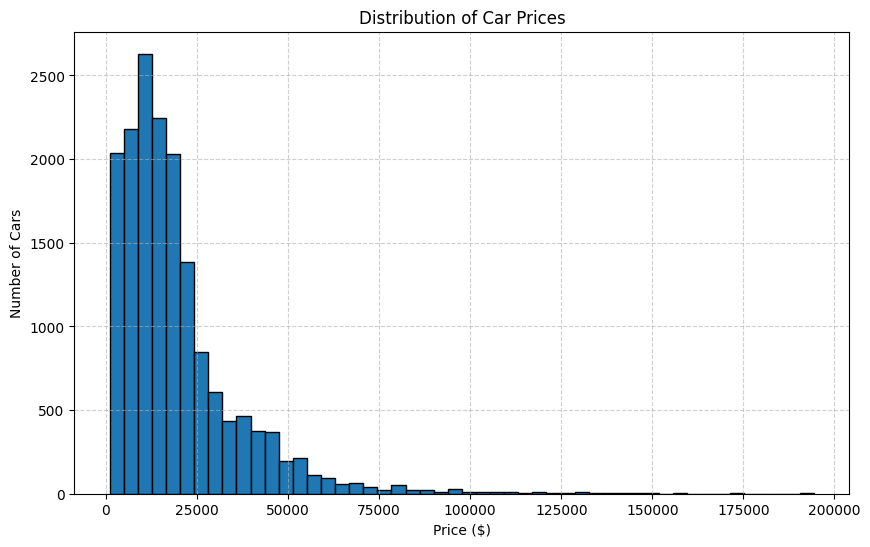

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_filtered['Price'], bins=50, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Step 3.2 — Relationship between production year and price
Display a scatter plot to observe how car prices change with production year.
Each dot represents one car.  
We expect newer cars to have generally higher prices.


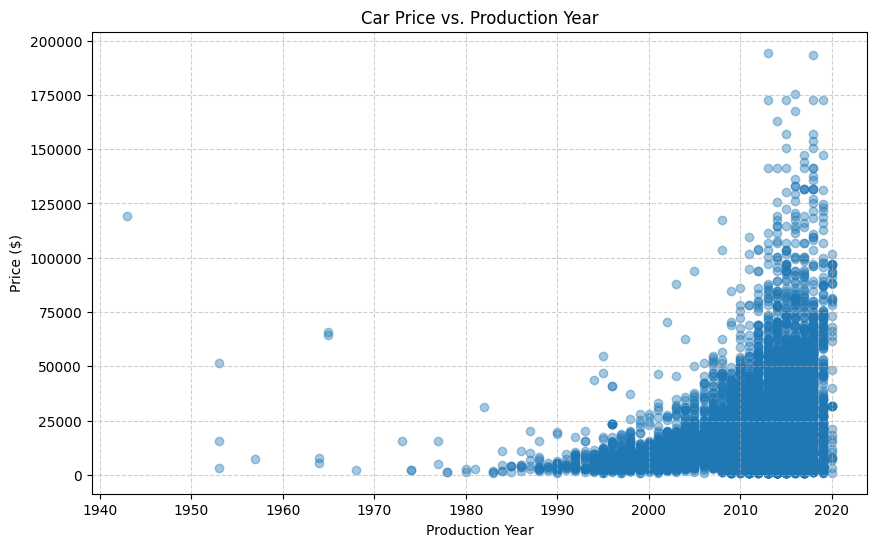

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Prod. year'], df_filtered['Price'], alpha=0.4)
plt.title('Car Price vs. Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Step 3.3 — Add a Linear Trend Line (based on actual dataset limits)
Add a regression line to visualize the overall relationship between production year and price.  
The axes are automatically scaled according to the minimum and maximum values in the dataset,  
so the plot accurately represents the full range of your car data.


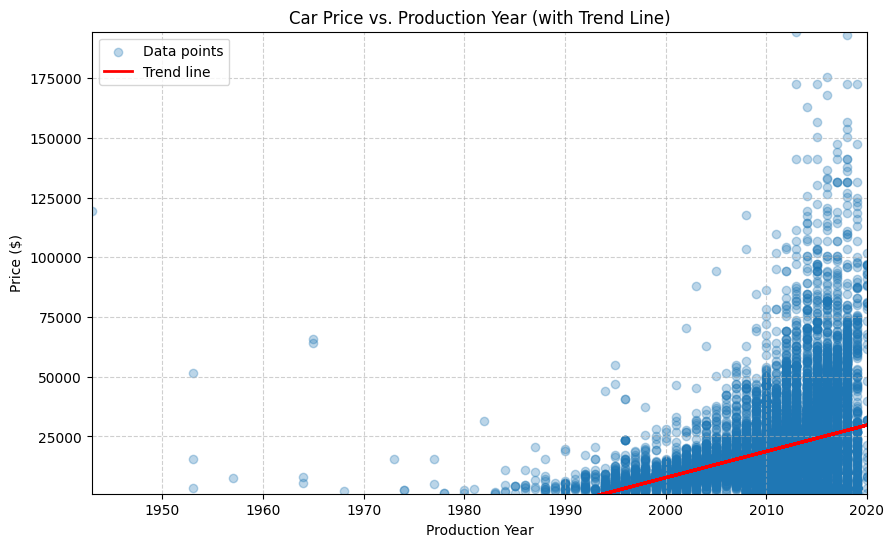

Trend line coefficients: slope = 1099.96, intercept = -2192198.16
X range (years): 1943 → 2020
Y range (price): 1000$ → 194438$


In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Compute linear regression coefficients
x = df_filtered['Prod. year']
y = df_filtered['Price']
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)

# Dynamic axis limits based on dataset
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3, label='Data points')
plt.plot(x, trend(x), color='red', linewidth=2, label='Trend line')

plt.title('Car Price vs. Production Year (with Trend Line)')
plt.xlabel('Production Year')
plt.ylabel('Price ($)')

# Use dataset’s real limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Trend line coefficients: slope = {coeffs[0]:.2f}, intercept = {coeffs[1]:.2f}")
print(f"X range (years): {x_min} → {x_max}")
print(f"Y range (price): {y_min}$ → {y_max}$")


### Step 3.4 — Alternative Visualization: Log Scale & Polynomial Fit
To gain a deeper understanding of how prices grow over time, we can visualize the same data using:
1. **Logarithmic scale (Y-axis)** — reduces skew from extremely high prices and helps reveal structure in lower-price cars.  
2. **Polynomial regression (2nd-degree)** — models possible *non-linear* growth where prices rise faster in recent years.


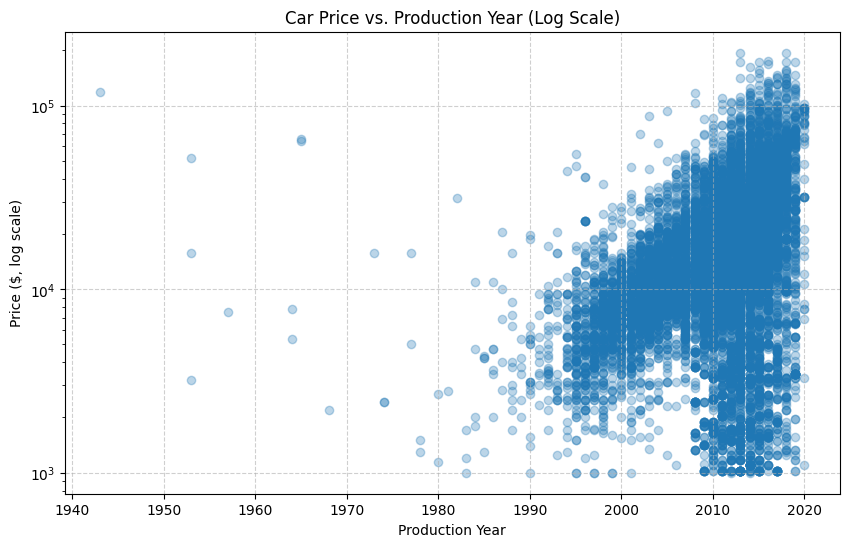

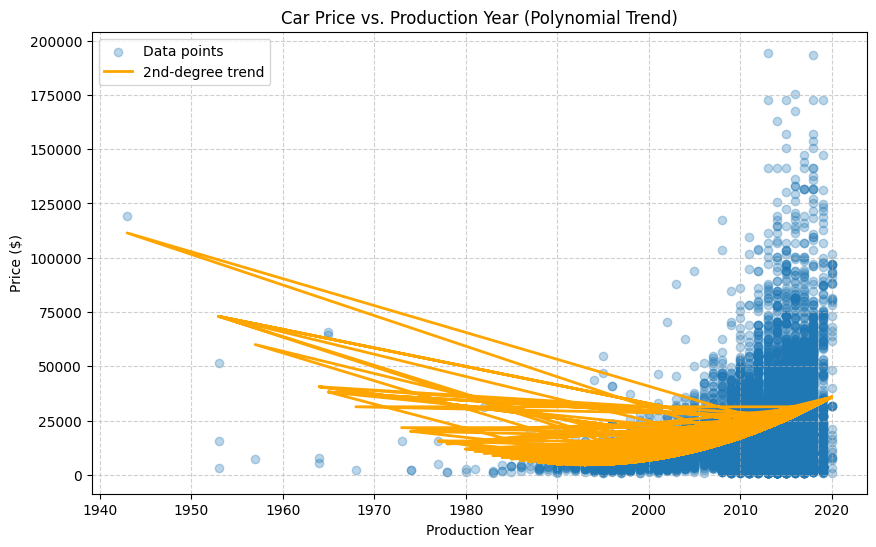

Polynomial coefficients: [ 4.27093720e+01 -1.70239523e+05  1.69648323e+08]


In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
x = df_filtered['Prod. year']
y = df_filtered['Price']

# --- 1. Log scale visualization ---
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3)
plt.yscale('log')
plt.title('Car Price vs. Production Year (Log Scale)')
plt.xlabel('Production Year')
plt.ylabel('Price ($, log scale)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 2. Polynomial regression (2nd degree) ---
coeffs_poly = np.polyfit(x, y, 2)
poly_fit = np.poly1d(coeffs_poly)

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3, label='Data points')
plt.plot(x, poly_fit(x), color='orange', linewidth=2, label='2nd-degree trend')
plt.title('Car Price vs. Production Year (Polynomial Trend)')
plt.xlabel('Production Year')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Polynomial coefficients:", coeffs_poly)


## Step 4 — Model Building

### Step 4.1 — Prepare data for modeling
We’ll define:
- `X` → feature (Production Year)  
- `y` → target (Price)

Then we’ll split data into training and test sets  
so the model is evaluated on data it hasn’t seen before.


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define X and y
X = df_filtered[['Prod. year']]
y = df_filtered['Price']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 13320
Testing samples: 3330


### Step 4.2 — Train the Linear Regression model
Fit the model using the training data.


In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Model trained successfully")
print(f"Slope (a): {slope:.2f}")
print(f"Intercept (b): {intercept:.2f}")


Model trained successfully
Slope (a): 1107.13
Intercept (b): -2206535.70


### Step 4.3 — Evaluate the model
Make predictions on the test data and check how well they match the actual prices.
We’ll use:
- `R²` score → how much of the price variation is explained by the model  
- `MAE` (Mean Absolute Error) → average prediction error in $


In [81]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")


R² score: 0.1201
Mean Absolute Error: $10682.87


### Step 4.4 — Visualize actual vs predicted prices
Plot the test data (blue points) and the model’s predictions (red line).


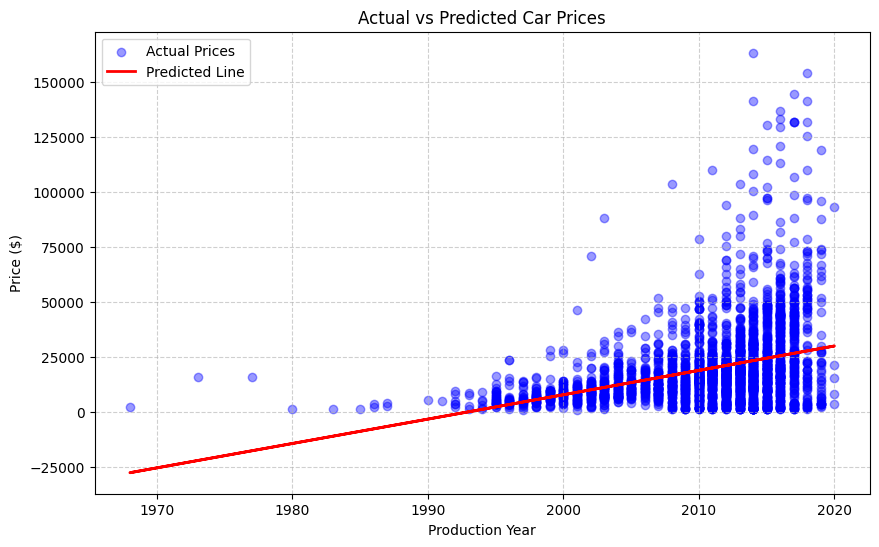

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Production Year')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Step 4.5 — Evaluation Summary and Insights

The linear regression model successfully quantified the relationship between **production year** and **price**.

#### Model Parameters
- **Slope (a):** 1107.13  
  → On average, each additional production year increases the car price by about \$1,107.  
- **Intercept (b):** -2,206,535.70  
  → The mathematical intercept, not meaningful on its own (represents year 0).

#### Model Performance
- **R² score:** 0.1201 → The model explains about 12% of the variation in car prices.  
  This is expected since the model uses only one feature (production year).  
- **MAE:** \$10,682.87 → On average, the predictions differ from actual prices by about \$10k.

#### Interpretation
- The model demonstrates a **clear positive correlation** between a car’s production year and its price —  
  newer cars are generally more expensive.  
- However, because price depends on multiple other factors (brand, engine, mileage, fuel type, etc.),  
  this simple one-feature model cannot fully predict prices with high accuracy.

#### Conclusion
This experiment achieved its goal — to **verify and measure** how car production year affects price.  
Future improvements could include:
- Adding more features such as `Mileage`, `Engine volume`, and `Manufacturer`;  
- Applying advanced models (e.g., `RandomForestRegressor` or `Polynomial Regression`);  
- Performing feature normalization and outlier analysis to improve prediction accuracy.


# Bonus Analysis — Relationship Between Engine Volume and Vehicle Tax (Levy)
In this section, we explore whether the **vehicle tax (Levy)** depends on the **engine volume**.  
This analysis extends the project beyond price prediction and investigates another real-world economic relationship in the dataset.

### Cleaning the data
Before we can analyze the relationship, we must clean both columns:
- Remove all invalid or non-numeric values from `Levy`.
- Extract only numeric engine volumes (remove words like “Turbo”, “Hybrid”, “L”, etc.).

In [83]:
import numpy as np
import re

# Copy relevant columns
df_bonus = df[['Engine volume', 'Levy']].copy()

# Remove rows where Levy == '-'
df_bonus = df_bonus[df_bonus['Levy'] != '-']

# Convert Levy to numeric
df_bonus['Levy'] = pd.to_numeric(df_bonus['Levy'], errors='coerce')

# Extract numeric part of engine volume (remove "Turbo", "Hybrid", etc.)
df_bonus['Engine volume'] = (
    df_bonus['Engine volume']
    .astype(str)
    .apply(lambda x: re.findall(r'\d+\.?\d*', x)[0] if re.findall(r'\d+\.?\d*', x) else np.nan)
    .astype(float)
)

# Drop missing or invalid rows
df_bonus = df_bonus.dropna(subset=['Engine volume', 'Levy'])

print(f"Cleaned dataset shape: {df_bonus.shape}")
df_bonus.head(10)


Cleaned dataset shape: (13418, 2)


,Engine volume,Levy
0,3.5,1399
1,3.0,1018
3,2.5,862
4,1.3,446
5,2.0,891
6,1.8,761
7,2.4,751
8,2.5,394
10,3.5,1053
13,3.5,1055


### Visualizing the relationship
We will use a scatter plot to visually inspect whether larger engines correspond to higher taxes.  
A clear upward trend would suggest that vehicles with higher engine volume are taxed more heavily.


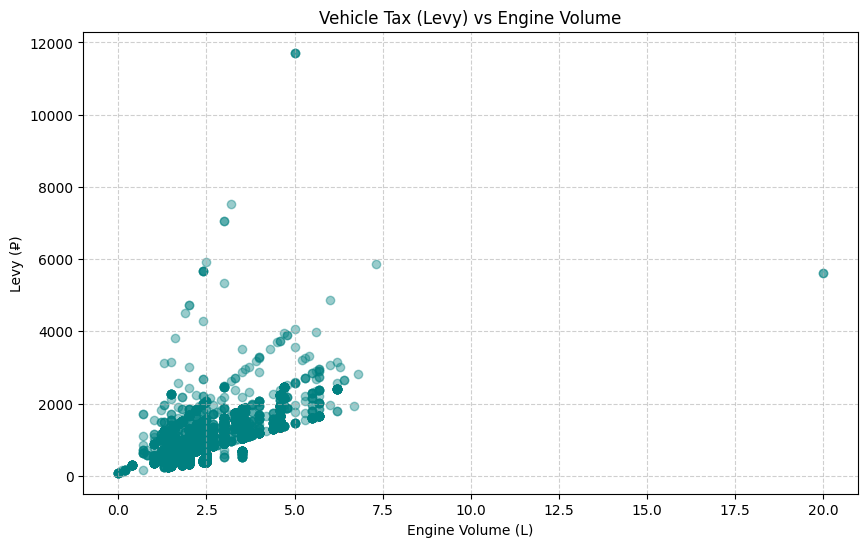

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df_bonus['Engine volume'], df_bonus['Levy'], alpha=0.4, color='teal')
plt.title('Vehicle Tax (Levy) vs Engine Volume')
plt.xlabel('Engine Volume (L)')
plt.ylabel('Levy (₽)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Building a simple regression model
To quantify this relationship, we train a **Linear Regression model**.  
This will show how much the tax increases per additional liter of engine capacity.


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X = df_bonus[['Engine volume']]
y = df_bonus['Levy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_bonus = LinearRegression()
model_bonus.fit(X_train, y_train)

y_pred = model_bonus.predict(X_test)

r2_bonus = r2_score(y_test, y_pred)
mae_bonus = mean_absolute_error(y_test, y_pred)

print(f"Slope (a): {model_bonus.coef_[0]:.2f}")
print(f"Intercept (b): {model_bonus.intercept_:.2f}")
print(f"R² score: {r2_bonus:.4f}")
print(f"Mean Absolute Error: {mae_bonus:.2f}")


Slope (a): 341.24
Intercept (b): 116.19
R² score: 0.3528
Mean Absolute Error: 216.46


### Observations
- **Slope (a):** indicates how much the tax increases for each additional liter of engine volume.  
- **R² score:** measures the strength of correlation between engine size and tax.  
  A higher R² means engine size explains most of the tax variation.  
- **MAE:** shows the average prediction error.

If the scatter plot and regression line show an upward trend,  
this confirms that larger engines tend to be taxed more — which aligns with real-world logic.  
This analysis demonstrates your ability to extend data-driven reasoning beyond the primary task,  
showing initiative and deeper analytical insight.


# Evaluation & Conclusion

The Linear Regression model achieved an **R² score of 0.12**, meaning that the model explains about **12 %** of the variation in car prices based on production year.  
The **Mean Absolute Error (MAE)** of approximately **10,600 ₽** indicates that the average prediction error is moderate, which is reasonable given that we used only a single feature.

Although the correlation is positive — newer cars tend to have higher prices — the relatively low R² score suggests that other factors, such as **mileage, brand, engine size, and condition**, also have significant influence on price.

### Key Insights
- There is a general upward trend between **production year** and **car price**, confirming real-world expectations.  
- The model’s limitations come from its simplicity; it uses only one predictor.  
- Future improvements could include building a **multi-feature regression model** using variables like `Engine volume`, `Mileage`, and `Manufacturer`.

This conclusion completes the first mini-project of Module 1 and provides a solid base for the next modules, where more advanced models and richer datasets will be introduced.
